# __Laboratorio 4: Búsqueda informada (Parte 1)__

El siguiente taller de corresponde a la aplicación de algoritmos de búsqueda informada en la solución de problemas en inteligencia artificial. Para el desarrollo del laboratorio tenga en cuenta lo siguiente:

* La actividad puede realizarse en grupos de máximo 4 personas
* La solución al taller debe enviarse en un notebook a través de Moodle. Se debe adjuntar el archivo. No se aceptan enlaces
* El objetivo del taller es hacer énfasis en el proceso de modelamiento. Por esta razón se deben utilizar como base para la soluciones propuestas las clases y métodos disponibles en la sección recursos. __Otras implementaciones no serán tenidas en cuenta__.
* Si se detecta cualquier tipo de fraude, la calificación de 0.0.
* El taller deberá ser sustentando por uno de los miembros del grupo
* Las soluciones propuestas deben cumplir con las recomendaciones de código limpio especificadas en el [PEP8](https://pep8.org/), de lo contrario será penalizado

## __0. Recursos__

La clase abstracta `SearchProblem` servirá como una plantilla general para el proceso de formulación del problema como un problema de búsqueda. Cualquier implementación deberá heredar de esta clase

In [ ]:
expandidos_grafico = []

In [ ]:
class SearchProblem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial, goal=None, **kwds): 
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal
        self.x_size = 0
        self.y_size = 0
        self.porcentaje_obstaculos = 0
        self.obstaculos = []
        self.tablero = []
        
    def actions(self, node):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""        
        raise NotImplementedError
        
    def result(self, node, action): 
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError
        
    def is_goal(self, node): 
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""      
        return self.goal == node
    
    def action_cost(self, s, a, s1): 
        """Return the cost of a solution path that arrives at state s1 from
        state s via action a. If the problem
        is such that the path doesn't matter, this function will only look at
        state s1.  If the path does matter, it will consider state s1
        and action a. The default method costs 1 for every step in the path."""
        return 1

    def h(self, node):
     raise NotImplementedError 
     
    def g(self, node):
     return node.path_cost()

    def f(self, node):
     return self.g(node) + self.h(node)  

También es posible implementar la clase abstracta `Node` para representar los posibles estados del problemas.

In [ ]:
class Node:
    def __init__(self, state=[0,0], parent=None, action=None, cost=1):
        self.state = state
        self.parent = parent
        self.action = action

    def states_path(self):
        if self.parent == None:
            return [self]
        return self.parent.states_path() + [self]
    
    def actions_path(self):
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]        

    def __eq__(self, node):
        if node:
            return self.state == node.state
        return False    

    def path_cost(self):
        total_cost = 0
        if self.parent is None:
            return total_cost
        total_cost += self.cost + self.parent.path_cost()
        return total_cost 

    def __repr__(self):
        return str(self.state)  

## __Estructuras de datos - Cola de prioridad__

In [ ]:
import heapq
class PriorityQueue:
    """
      Implements a priority queue data structure. Each inserted item
      has a priority associated with it and the client is usually interested
      in quick retrieval of the lowest-priority item in the queue. This
      data structure allows O(1) access to the lowest-priority item.
    """
    def  __init__(self):
        self.heap = []
        self.count = 0

    def push(self, item, priority):
        entry = (priority, self.count, item)
        heapq.heappush(self.heap, entry)
        self.count += 1

    def pop(self):
        (_, _, item) = heapq.heappop(self.heap)
        return item

    def isEmpty(self):
        return len(self.heap) == 0

    def update(self, item, priority):
        # If item already in priority queue with higher priority, update its priority and rebuild the heap.
        # If item already in priority queue with equal or lower priority, do nothing.
        # If item not in priority queue, do the same thing as self.push.
        for index, (p, c, i) in enumerate(self.heap):
            if i == item:
                if p <= priority:
                    break
                del self.heap[index]
                self.heap.append((priority, c, item))
                heapq.heapify(self.heap)
                break
        else:
            self.push(item, priority)    
  

## __UCS__

In [ ]:
# UCS
def expand(problem, node):
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs    

def UCS(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            expandidos_grafico.append(closed)
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.g(child))


\## __VORAZ__

In [ ]:
# VORAZ

def VORAZ(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, problem.h(problem.initial))

    while(True):
        node = fringe.pop()
        if problem.is_goal(node):
            expandidos_grafico.append(closed)
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.h(child))


## __A*__

In [ ]:
# A*

def AA(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, problem.f(problem.initial))

    while(True):
        node = fringe.pop()
        if problem.is_goal(node):
            expandidos_grafico.append(closed)
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.f(child))


## __3. (1.5 Puntos) Un laberinto__

Considere el problema de navegar en un laberinto que puede representarse como un arreglo bidimensional. En el laberinto existen algunas celdas que se consideran obstáculos y no es posible atravesarlas. Un agente que se encuentra en el laberinto puede moverse a cualquiera de las 8 celdas adyacentes siempre que la celda no sea un obstáculo y no esté por fuera de los límites del laberinto. En este caso, podemos representar la posición del agente como una coordenada $(x, y)$. Por ejemplo, la coordenada $(4,2$). Adicionalmente, las acciones pueden representarse como conjunto de parejas $(dx, dy)$ en el cual $dx$ representa la variación de la posición en $x$ y $dy$ representa la variación de la posición en $y$. Por ejemplo, $(0,-1)$ representa dejar la coordenada x tal como está y disminuir la actual coordenada en $y$ en una unidad. A continuación, se presenta el laberito en que se encuentra el agente:

<center>

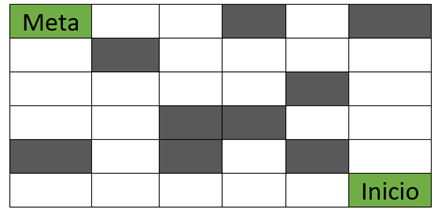

</center>
Para este problema:

* Modele este problema como un problema de búsqueda
* Implemente los algoritmos de búsquea UCS, Voraz y A* utilizando la distancia euclidiana como heurística y suponiendo que todos los movimientos cuestan 1 unidad.
* Compare la cantidad de nodos expandidos por UCS, Voraz y A*
* Construya una visualización para el laberinto, los obstaculos y la ruta encontrada. __Sugerencia__: Una forma de lograr esto es utilizar un mapa de calor.
 

In [ ]:
#Funcion para comprobar que el estado(mov) es valido
def comprobacion(x,y,obstaculos,tamano_x = 6,tamano_y = 6):
    if x in range(tamano_x) and y in range(tamano_y):
      if [x,y] not in obstaculos:
        return True
      else:
        return False
#Funcion para conocer los posibles cambios de estado
def posibilidades(estado,obstaculos,tamano_x,tamano_y):
    alrededor=[]
    for movimiento in ((0,1),(0,-1),(1,0),(1,-1),(-1,-1),(-1,1),(1,1),(-1,0)):
        if comprobacion(movimiento[0]+estado[0],movimiento[1]+estado[1],obstaculos,tamano_x,tamano_y):
            alrededor.append([movimiento[0]+estado[0],movimiento[1]+estado[1]])
    return alrededor

In [ ]:
class LABERINTO(SearchProblem):
  #'Simple Graph as a search problem'

  def actions(self, node):
    obstaculos = self.obstaculos
    x_tamanio = self.x_size
    y_tamanio = self.y_size
    return posibilidades(node.state,obstaculos,x_tamanio,y_tamanio)
  def result(self, node, action):
          
    new_node = Node(action, node, action)
    new_cost = self.action_cost(node,action,new_node)
    new_node.cost = new_cost
    return new_node 

  def action_cost(self, node, action, succesor):
    return 1
    
# Definicion de la heuristica
# Esta es: la cantidad de fichas que se encuentran en una posicion errada 

  def h(self, node):
    x_goal=self.goal.state[0]
    y_goal=self.goal.state[1]
    distancia_euclidiana = pow(pow(node.state[0]-x_goal,2)+pow(node.state[1]-y_goal,2),0.5)
    return distancia_euclidiana

In [ ]:
LABERINTO_1 = LABERINTO(Node([5,5]), Node([0,0]))
LABERINTO_1.obstaculos=[[3,3],[4,4],[1,1],[0,3],[0,5],[2,4],[3,2],[4,0],[4,2]]
LABERINTO_1.x_size = 6
LABERINTO_1.y_size = 6

In [ ]:
def solucion_Problema (problem,Algoritmo=''):
  print('Algoritmo ',Algoritmo,':')

  if Algoritmo == 'AA':
    solution = AA(problem)
  elif Algoritmo == 'UCS':
    solution = UCS(problem)
  elif Algoritmo == 'VORAZ':
    solution = VORAZ(problem)
  else:
    print('Algoritmo no reconocido')
    exit()

  print('Action sequence:', solution.actions_path())
  print('State sequence:', solution.states_path())
  print('Cost:', problem.g(solution))

In [ ]:
solucion_Problema(LABERINTO_1,'AA')

Algoritmo  AA :
Action sequence: [[4, 5], [3, 4], [2, 3], [1, 2], [0, 1], [0, 0]]
State sequence: [[5, 5], [4, 5], [3, 4], [2, 3], [1, 2], [0, 1], [0, 0]]
Cost: 6


In [ ]:
solucion_Problema(LABERINTO_1,'UCS')

Algoritmo  UCS :
Action sequence: [[4, 5], [3, 4], [2, 3], [1, 2], [0, 1], [0, 0]]
State sequence: [[5, 5], [4, 5], [3, 4], [2, 3], [1, 2], [0, 1], [0, 0]]
Cost: 6


In [ ]:
solucion_Problema(LABERINTO_1,'VORAZ')

Algoritmo  VORAZ :
Action sequence: [[5, 4], [4, 3], [3, 4], [2, 3], [1, 2], [0, 1], [0, 0]]
State sequence: [[5, 5], [5, 4], [4, 3], [3, 4], [2, 3], [1, 2], [0, 1], [0, 0]]
Cost: 7


Analisis comparativo en grafico de barras de los nodos expandidos de los algoritmos UCS, Voraz y A*

In [ ]:
#Recursos
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
nodos_expandidos=[]
for i in range(3):
  nodos_expandidos.append(np.size(expandidos_grafico[i]))

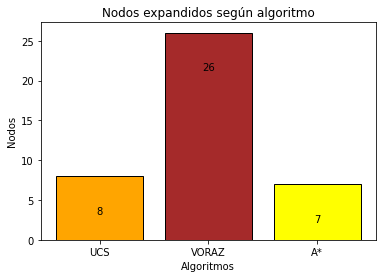

In [ ]:
etiquetas=['UCS','VORAZ','A*']
fig, ax = plt.subplots()
co=np.arange(3)
plt.bar(range(3),nodos_expandidos, align='center', color=['orange','brown','yellow'], edgecolor='black')
for i,n in enumerate(nodos_expandidos):
    ax.text( i , n-5, n, ha='center', va='bottom')
ax.set_title('Nodos expandidos según algoritmo')
ax.set_ylabel('Nodos')
ax.set_xticks(co)
ax.set_xticklabels(etiquetas)
ax.set_xlabel('Algoritmos')
plt.show()

¿Los resultados son acordes a la teoría?

R: Como era de esperar el algoritmo A * era aquel que menos nodos debia expandir, esto de la mano de la definicion de heuristica adecuada. Por otra parte, la ruta más optima fue dada tanto por los algoritmos de UCS y A *, sin embargo, Voraz fue aquel que expandió mas nodos debido a su definicion.

Hablando costos, los costos de A * y UCS son iguales como era de esperarse, mientras que Voraz no se aleja mucho de estos.

## __3. (2.0 puntos) Un generador de laberintos__

Generalice el problema anterior para dar al usuario la habilidad de configurar:

* El tamaño del laberinto
* El porcentaje de obstaculos en el tablero. A partir de ese valor los obstaculos se deben ubicar de manera aleatoria en las celdas disponibles.
* La ubicación inicial del agente

Para este problema:

* Modele este problema como un problema de búsqueda
* Implemente los algoritmos de búsquea UCS, Voraz y A* utilizando la distancia euclidiana como heurística y suponiendo que todos los movimientos cuestan 1 unidad.
* Compare la cantidad de nodos expandidos por UCS, Voraz y A*
* Construya una visualización para el laberinto, los obstaculos y la ruta encontrada. __Sugerencia__: Una forma de lograr esto de manera sencilla es utilizar un mapa de calor.
 

Definicion de un laberinto normal

Se captura la informacion del laberinto del usuario



In [ ]:
#Se solicita el tamaño del laberinto
print('Ingrese el tamaño del laberinto filas , columnas')
tamano_x = int(input())
tamano_y = int(input())
#Se solicita la posicion inicial del Agente
print('Ingrese la posicion inicial del Agente en el laberinto: x , y')
x = int(input())
y = int(input())
#Se solicita el porcentaje de obstaculos en el laberinto que se desea crear
print('Ingrese el porcentaje de obstaculos del laberinto')
porcentaje_obstaculos = int(input())/100

Ingrese el tamaño del laberinto filas , columnas
6
6
Ingrese la posicion inicial del Agente en el laberinto: x , y
5
5
Ingrese el porcentaje de obstaculos del laberinto
30


Se genera el laberinto con la info capturada

In [ ]:
LABERINTO_2 = LABERINTO(Node([x,y]), Node([0,0]))

Se asignan los valores que correspondan

In [ ]:
LABERINTO_2.x_size = tamano_x
LABERINTO_2.y_size = tamano_y

Se generan los obstaculos

Se asignan los obstaculos al laberinto

In [ ]:
import random

#Se calcula cuantas posiciones serán invalidas
cantidad_obstaculos=int(LABERINTO_2.x_size*LABERINTO_2.y_size*porcentaje_obstaculos)
print('Cantidad de obstaculos a generar:',cantidad_obstaculos)

#Ciclo para la creacion de los obstaculos 
while len(LABERINTO_2.obstaculos)<cantidad_obstaculos:
  x=random.randint(0, LABERINTO_2.x_size-1)
  y=random.randint(0, LABERINTO_2.y_size-1)
  if [x,y] not in LABERINTO_2.obstaculos and [x,y]!=LABERINTO_2.goal.state and [x,y]!=LABERINTO_2.initial.state:
    LABERINTO_2.obstaculos.append([x,y])

Cantidad de obstaculos a generar: 10


In [ ]:
from IPython.display import display
import ipywidgets as widgets
import time
from random import randint

celdas_x = LABERINTO_2.x_size
celdas_y = LABERINTO_2.y_size

class Tablero:
  def __init__(self, tamano_celda=(50, 50), n_celdas=(celdas_x,celdas_y)):
    self.out = widgets.HTML()
    display(self.out)
    self.tamano_celda = tamano_celda
    self.n_celdas = n_celdas

  def dibujar(self, objetos):
    tablero = "<table border='1' >{}</table>"
    filas = ""

    for i in range(self.n_celdas[0]):
      s = ""
      for j in range(self.n_celdas[1]):
        contenido =""
        for o in objetos:
          if o.x == i and o.y == j:
            contenido = \
            "<div style='transform: rotate({angulo}deg);font-size:{tamano_emoticon}px;'>{emoticon}</div>".\
            format(angulo = o.angulo, tamano_emoticon = o.tamano_emoticon, emoticon = o.emoticon)     
        s += "<td style='height:{alto}px;width:{ancho}px'>{contenido}</td>".\
          format(alto = self.tamano_celda[0], ancho = self.tamano_celda[1], 
                contenido = contenido)
      filas += "<tr>{}</tr>".format(s)
    tablero = tablero.format(filas)
    self.out.value = tablero

In [ ]:
class Agente:
  def __init__(self, x=0, y=0, angulo=0, emoticon="🤖", tamano_emoticon=30):
    self.x = x
    self.y = y
    self.emoticon = emoticon
    self.tamano_emoticon = tamano_emoticon
    self.angulo = angulo

Visualizacion 

In [ ]:
def visualizacion(Algoritmo=''):
  problem = LABERINTO_2
  objetos = []
  goal = problem.goal
  start = problem.initial
  obstaculos = problem.obstaculos 
  for i in obstaculos:
      basura = Agente(i[0], i[1], emoticon="🍂", tamano_emoticon=30)
      objetos.append(basura)

  agente = Agente(start.state[0], start.state[1], emoticon="🤖", tamano_emoticon=30)
  objetos.append(agente)

  finish = Agente(goal.state[0], goal.state[1], emoticon="🚩", tamano_emoticon=30)
  objetos.append(finish)


  escenario = Tablero(n_celdas=(celdas_x,celdas_y))

  print('Algoritmo ',Algoritmo,':')

  if Algoritmo == 'AA':
    solution = AA(problem)
  if Algoritmo == 'UCS':
    solution = UCS(problem)
  if Algoritmo == 'VORAZ':
    solution = VORAZ(problem)

  print('Action sequence:', solution.actions_path())
  print('State sequence:', solution.states_path())
  print('Cost:', problem.g(solution))
  escenario.dibujar(objetos)
  time.sleep(2)

  for movimiento in solution.actions_path():
    escenario.dibujar(objetos)
    objetos.append(Agente(movimiento[0], movimiento[1], 0, emoticon="G", tamano_emoticon=50))
    time.sleep(0.5)

  escenario.dibujar(objetos)
  print(obstaculos)

In [ ]:
visualizacion('AA')

HTML(value='')

Algoritmo  AA :
Action sequence: [[4, 4], [3, 4], [2, 3], [1, 2], [0, 1], [0, 0]]
State sequence: [[5, 5], [4, 4], [3, 4], [2, 3], [1, 2], [0, 1], [0, 0]]
Cost: 6
[[4, 0], [1, 1], [5, 2], [3, 3], [5, 4], [2, 2], [3, 2], [1, 3], [4, 2], [1, 0]]


In [ ]:
visualizacion('UCS')

HTML(value='')

Algoritmo  UCS :
Action sequence: [[4, 4], [3, 4], [2, 3], [1, 2], [0, 1], [0, 0]]
State sequence: [[5, 5], [4, 4], [3, 4], [2, 3], [1, 2], [0, 1], [0, 0]]
Cost: 6
[[4, 0], [1, 1], [5, 2], [3, 3], [5, 4], [2, 2], [3, 2], [1, 3], [4, 2], [1, 0]]


In [ ]:
visualizacion('VORAZ')

HTML(value='')

Algoritmo  VORAZ :
Action sequence: [[5, 4], [4, 3], [3, 4], [2, 3], [1, 2], [0, 1], [1, 0], [0, 1], [0, 0]]
State sequence: [[5, 5], [5, 4], [4, 3], [3, 4], [2, 3], [1, 2], [0, 1], [1, 0], [0, 1], [0, 0]]
Cost: 9
[[4, 0], [1, 1], [5, 2], [3, 3], [5, 4], [2, 2], [3, 2], [1, 3], [4, 2], [1, 0]]
